In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


E' necessario portare il vettore y a un array 2D perchè il feature scaling richiede un array 2D

In [3]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Non viene diviso in train e test perchè i dati sono troppo pochi per cui conviene usarli tutti per il train.

E' necessario fare il feature scaling perchè la relazione tra le variabili nell'SRV è implicita, non ci sono coefficienti che possono fungere da scaling.

Il feature scaling viene quindi applicato a tutto il set di dati in quando appunto non sono stati divisi in train and test.

Vanno usati due diversi scaler perchè lo scaler calcola media e deviazione standard per standardizzare i dati. Ovviamente questi sono diversi tra X e y.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
sc_2 = StandardScaler()
y = sc_2.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


ravel() riporta l'array a un array 1D necessario per il fit

SRV è ottimo per moltissimi modelli. Può modellare dati lineari e non, basta cambiare il kernel. In questo caso viene usato un kernel non lineare.

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y.ravel())


SVR()

Il risultato è dato in scala standard. Bisogna riportare y_pred alla scala originale.

Visto che anche i dati iniziali erano scalati, per trovare il risultato scalato corretto bisogna anche predirre con la X scalata

In [16]:
y_pred = regressor.predict(sc.transform([[6.5]]))
print(y_pred)
y_final = sc_2.inverse_transform([y_pred])
print(y_final)

[-0.27861589]
[[170370.0204065]]


Text(0, 0.5, 'Salary')

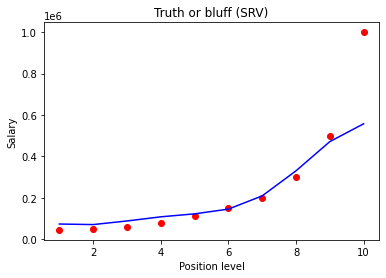

In [28]:
y_pred_arr = np.array(regressor.predict(X))
plt.scatter(sc.inverse_transform(X), sc_2.inverse_transform(y), color="red")
plt.plot(sc.inverse_transform(X), sc_2.inverse_transform(y_pred_arr.reshape(len(y_pred_arr),1)), color="blue")
plt.title("Truth or bluff (SRV)")
plt.xlabel("Position level")
plt.ylabel("Salary")

La predizione è buona. E' normale che l'SVR non tenga ben conto di valori estremi (outliers)